In [1]:
from utils import tools
import matplotlib.pyplot as plt

In [2]:
def concatenate(data_path):
    csv_paths = tools.get_subpaths(data_path + "history*.csv")
    csv_paths = tools.natural_sort(csv_paths)
    loss, auc = [], []
    for i, path in enumerate(csv_paths):
        if i > 50:
            break
        data = tools.read_csv(path)[0][0].split(",")
        l = data[0]
        a = data[1]
        if l == '':
            continue
        loss.append(float(l))
        auc.append(float(a))
    # print(loss)
    return loss, auc


In [9]:
def plot(data, name, target):
    plt.plot(range(1, len(data) + 1), data)
    if target == "loss":
        plt.axis([0, len(data), 0, max(data) + 0.1])
        plt.title(name + " Log Loss")
    elif target == "auc":
        plt.axis([0, len(data), 0, 1])
        plt.title(name + " AUC")
    plt.show()


0.24555757641792297
0.857957661151886


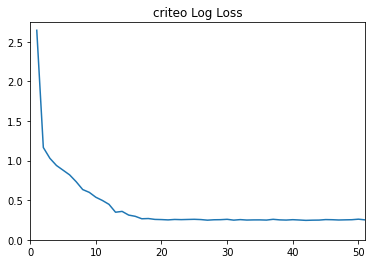

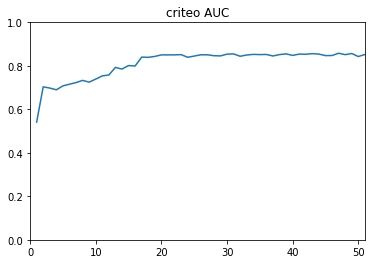

0.09440647065639496
0.9025157690048218


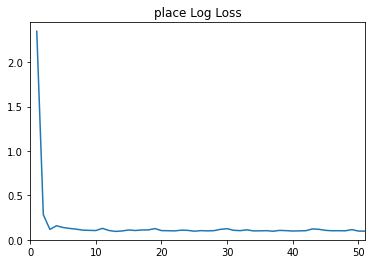

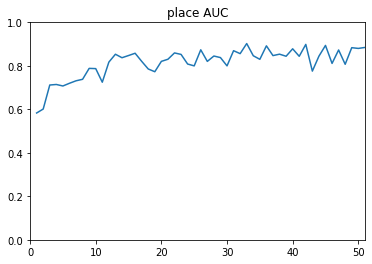

In [11]:
path = "/Users/user/juhochoi/models/xdeepfm/"
data_names = ["criteo", "place"]
for name in data_names:
    data_path = path + name + "/fold0/"
    loss, auc = concatenate(data_path)
    print(min(loss))
    print(max(auc))
    plot(loss, name, target = "loss")
    plot(auc, name, target = "auc")